 # Funciones auxiliares en OpenCV-python
 Se listan a continuación algunas funciones comunes de OpenCV y otras que las complementan. En general, la implementación de OpenCV es más eficiente que las de otras librerías de python, por lo que se prefiere por ejemplo para el cálculo de transformaciones, histogramas, etc.  


In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys

print("Python version %s / OpenCV version %s " %(sys.version,cv.__version__))

Python version 3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0] / OpenCV version 4.1.2 


Activo mi entorno GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ustedes deberán indicar el path a la imagen en su Drive o subir el archivo correspondiente a Colab.

img_gray = cv.imread("/content/drive/My Drive/PDI/camino.tif",cv.IMREAD_GRAYSCALE)
img_color = cv.imread("/content/drive/My Drive/PDI/camino.tif") # color

# Visualización con Opencv: esto no funciona en el entorno Colab, pero es util
# para hacer aplicaciones en PC.
# cv.imshow("Titulo 1",img1)
# cv.waitKey(0)
# cv.destroyAllWindows()

Podemos utilizar matplotlib, que nos permite graficar imágenes y dibujar gráficas. pyplot funciona de manera muy similar a matlab


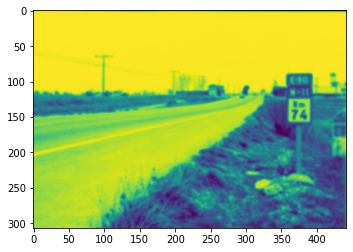

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img_gray)

Por defecto, las imágenes se dibujan en escala de grises con un mapa de color (contenido del Tema 2).

También podemos especificar diversas opciones a la gráfica. Tener en cuenta que el orden de los canales de color de OpenCV es BGR mientras que en pyplot es RGB


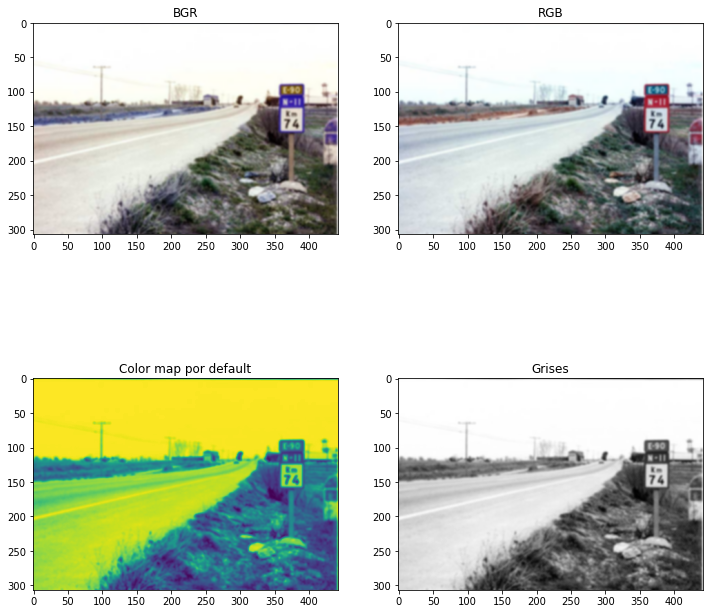

In [ ]:
# cuatro imagenes en una figura
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# Por defecto, imshow toma imágenes HXCX3 como RGB, mientras que opencv usa BGR
ax[0,0].imshow(img_color)
ax[0,0].set_title("BGR")
ax[0,1].imshow(img_color[:,:,[2,1,0]]) # invierte los canales BGR [0,1,2] --> RGB [2,1,0]
# recorre desde el ultimo elemento al primero
ax[0,1].set_title("RGB")

# Si es de un solo canal, y no se especifica nada mas, se dibuja una imagen con un mapa de color por defecto, asignando a cada nivel de gris un color RGB
ax[1,0].imshow(img_gray)
ax[1,0].set_title("Color map por default")
# para representar correctamente una imagen de grises, usar el mapa da color
# "gray" y explicitar el valor minimo y máximo de intensidad.
ax[1,1].imshow(img_gray,cmap="gray",vmin=0,vmax=255)
ax[1,1].set_title("Grises")

plt.show()

La imagen es un ndarray de numpy, por tanto podemos usar muchas funciones simples de este módulo

In [ ]:
print("Valores de una esquina de la imagen (2x2 pixeles):")
print(img_color[:2, :2, :])
print()

print("Alto, ancho y n_canales = %s" %str(img_color.shape))
print("Tipo de datos de imagen", img_color.dtype)

print("valor medio %.3f, mínimo %d, máximo %d" %(np.mean(img_color),
                                                 np.min(img_color),
                                                 np.max(img_color)))


Valores de una esquina de la imagen (2x2 pixeles):
[[[208 208 208]
  [211 211 211]]

 [[231 231 231]
  [232 232 232]]]

Alto, ancho y n_canales = (307, 442, 3)
Tipo de datos de imagen uint8
valor medio 183.898, mínimo 1, máximo 255


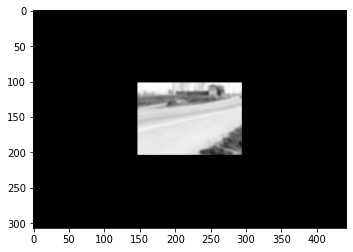

In [ ]:
# Podemos generar una mascara binaria para operar con imágenes.
mask = np.zeros(img_gray.shape, dtype=img_gray.dtype) # dtype: 'int8', bool, float, tener en cuenta el tipo de dato al realizar las operaciones

# O bien:
mask = img_gray.copy()
mask[:]=0

# Las imagenes son objetos y para hacer copias se debe tener en cuenta que el operador de asignación ("=") copia el puntero al objeto.
# Generamos una ROI con unos en la máscara
H, W = img_gray.shape
mask[int(H/3):int(2*H/3),int(W/3):int(2*W/3)]=255 # Máscara rectangular

# operación AND pixel a pixel
img_recorte=cv.bitwise_and(img_gray,mask)

plt.imshow(img_recorte,cmap="gray",vmin=0,vmax=255)
plt.show()

## Perfil de intensidad e histogramas
Graficamos el perfil de intensidad de una linea y el histograma de la imágen

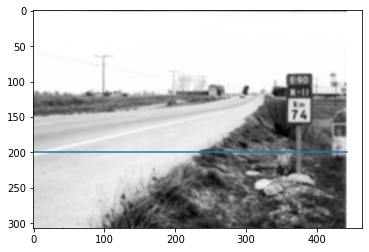

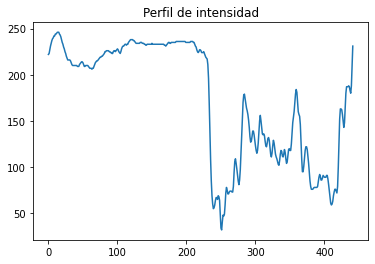

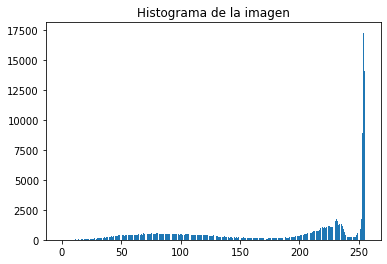

In [ ]:
line=200
plt.figure()
plt.imshow(img_gray,cmap='gray')
plt.plot([0,img_gray.shape[1]],[line,line])

plt.figure()
plt.plot(img_gray[line,:])
plt.title("Perfil de intensidad")

plt.figure()
#cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
hist=cv.calcHist([img_gray], [0], None, [256], [0,256])
plt.bar(range(256),np.squeeze(hist))
plt.title("Histograma de la imagen")

plt.show()

# Interfaces de comunicación en Colab
Esta funcionalidad ya está incorporada en Colab por medio del módulo `ipywidgets`, para utilizarlo en Jupyter, seguir las [instrucciones de instalación](https://ipywidgets.readthedocs.io/en/stable/user_install.html).

OpenCV también tiene sus propias [herramientas para construir una GUI](https://docs.opencv.org/4.2.0/d7/dfc/group__highgui.html). Sin embargo, no están soportadas en Colab. Para utilizar las funciones de OpenCV para manejo de eventos, se deben correr en un script fuera de Colab.

## Slider interactivo para cambiar el brillo de una imagen

Utilizaremos el método `interact` de la biblioteca `ipywidget`. Para más información sobre el método, consultar [la documentación](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).

Primero, mostraremos un ejemplo sencillo:



In [ ]:
from ipywidgets import interact

def f(x):
  return x

interact(f, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

Ahora uno más complejo, donde utilizamos la función interact para actualizar el brillo de una imagen.

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact

def bright(x):
    #img_new=img_gray+x # tener en cuenta la profundidad en bits cuando se hacen operaciones aritméticas
    img_new=cv.add(img_gray,x)
    plt.imshow(img_new,cmap="gray",vmin=0,vmax=255)
    plt.title("Modificando brillo de la imagen: %d" % x)
    plt.show()

interact(bright,x=widgets.IntSlider(min=-100,max=100,step=1,value=10))


interactive(children=(IntSlider(value=10, description='x', min=-100), Output()), _dom_classes=('widget-interac…

<function __main__.bright>

# Check-box con interact

También podemos usar `interact` para generar check-boxes que nos devuelvan verdadero o falso. Por ejemplo, para visualizar una imagen a color o en blanco y negro:

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact

def showColorImage(x):
    if x:
      # Por defecto, imshow toma imágenes HXCX3 como RGB, mientras que opencv usa BGR
      plt.imshow(img_color[:,:,[2,1,0]])
      plt.title("Imagen a color")
      plt.show()
    else:
      plt.imshow(img_gray,cmap="gray",vmin=0,vmax=255)
      plt.title("Imagen en escala de grises")
      plt.show()


interact(showColorImage,x=widgets.Checkbox(description="Mostrar imagen a color: ", value=True))


interactive(children=(Checkbox(value=True, description='Mostrar imagen a color: '), Output()), _dom_classes=('…

<function __main__.showColorImage>

## Dibujar una linea en una imagen y desplazarla por medio de barras interactivas.



In [ ]:
import ipywidgets as widgets
from ipywidgets import interact

def line(x1, x2, y1, y2):
    imagen = img_color.copy()
    cv.line(imagen, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(imagen[:,:,[2,1,0]])
    plt.show()

interact(line,x1=widgets.IntSlider(min=0,max=img_gray.shape[1],step=1,value=10), x2=widgets.IntSlider(min=0,max=img_gray.shape[1],step=1,value=20),
         y1 = widgets.IntSlider(min=0,max=img_gray.shape[0],step=1,value=30), y2 = widgets.IntSlider(min=0,max=img_gray.shape[0],step=1,value=20))


interactive(children=(IntSlider(value=10, description='x1', max=442), IntSlider(value=20, description='x2', ma…

<function __main__.line>